## FP-Growth Algorithm

The FP-Growth (Frequent Pattern Growth) algorithm is an efficient and scalable method for mining frequent itemsets. Unlike the Apriori algorithm, FP-Growth does not generate candidate itemsets. Instead, it uses a data structure called the FP-tree (Frequent Pattern Tree) to mine frequent patterns directly.

### Mathematical Foundation

The FP-Growth algorithm works by compressing the dataset using an FP-tree and then mining the frequent itemsets from this compressed representation. The main advantage of FP-Growth over Apriori is that it avoids the costly candidate generation step and reduces the number of database scans.

### Steps of the Algorithm

1. **Construct the FP-tree**: Scan the database to find the frequent 1-itemsets and their supports. Use these frequent items to build the FP-tree.
2. **Mine the FP-tree**: Recursively mine the FP-tree to find all frequent itemsets.

#### Constructing the FP-tree
1. **Scan the database to find frequent 1-itemsets**: Use a support threshold to identify items that appear frequently.
2. **Order the items**: Sort the items in descending order of their frequency.
3. **Build the FP-tree**: Insert transactions into the FP-tree, maintaining the item order.

#### Mining the FP-tree
1. **Create conditional FP-trees**: For each item, construct a conditional FP-tree.
2. **Recursively mine the conditional FP-trees**: Find frequent itemsets from these conditional FP-trees.

### Python Implementation

Let's implement the FP-Growth algorithm in Python using the `mlxtend` library.


In [5]:
# Import necessary libraries
import pandas as pd
from mlxtend.frequent_patterns import fpgrowth, association_rules

# Sample dataset: transactions
data = {'Transaction': [1, 2, 3, 4, 5],
        'Items': [['Milk', 'Bread'],
                  ['Milk', 'Diapers', 'Beer', 'Eggs'],
                  ['Milk', 'Diapers', 'Beer', 'Cola'],
                  ['Bread', 'Butter'],
                  ['Milk', 'Diapers', 'Beer', 'Bread']]}

# Convert to DataFrame
df = pd.DataFrame(data)

In [6]:
# Create a one-hot encoded DataFrame
one_hot = df['Items'].str.join('|').str.get_dummies().astype(bool)

In [7]:
print(one_hot)

    Beer  Bread  Butter   Cola  Diapers   Eggs   Milk
0  False   True   False  False    False  False   True
1   True  False   False  False     True   True   True
2   True  False   False   True     True  False   True
3  False   True    True  False    False  False  False
4   True   True   False  False     True  False   True


In [8]:
# Apply the FP-Growth algorithm
frequent_itemsets = fpgrowth(one_hot, min_support=0.6, use_colnames=True)

In [9]:
# Generate association rules
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.7)

In [10]:
# Display the results
print(frequent_itemsets)

   support               itemsets
0      0.8                 (Milk)
1      0.6                (Bread)
2      0.6              (Diapers)
3      0.6                 (Beer)
4      0.6        (Diapers, Milk)
5      0.6        (Diapers, Beer)
6      0.6           (Beer, Milk)
7      0.6  (Diapers, Beer, Milk)


In [11]:
print(rules)

        antecedents      consequents  antecedent support  consequent support  \
0         (Diapers)           (Milk)                 0.6                 0.8   
1            (Milk)        (Diapers)                 0.8                 0.6   
2         (Diapers)           (Beer)                 0.6                 0.6   
3            (Beer)        (Diapers)                 0.6                 0.6   
4            (Beer)           (Milk)                 0.6                 0.8   
5            (Milk)           (Beer)                 0.8                 0.6   
6   (Diapers, Beer)           (Milk)                 0.6                 0.8   
7   (Diapers, Milk)           (Beer)                 0.6                 0.6   
8      (Beer, Milk)        (Diapers)                 0.6                 0.6   
9         (Diapers)     (Beer, Milk)                 0.6                 0.6   
10           (Beer)  (Diapers, Milk)                 0.6                 0.6   
11           (Milk)  (Diapers, Beer)    

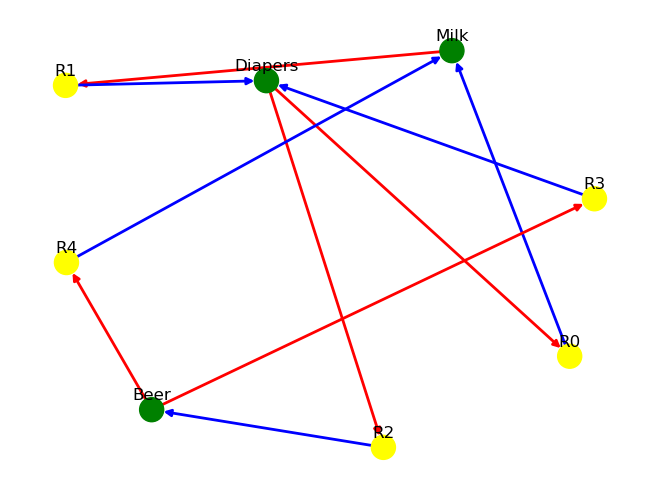

In [12]:
# Plot the rules
import matplotlib.pyplot as plt
import networkx as nx

def draw_graph(rules, rules_to_show):
    G = nx.DiGraph()
    
    color_map = []
    for i in range(rules_to_show):
        G.add_nodes_from(["R"+str(i)])
        
        for antecedents in rules.iloc[i]['antecedents']:
            G.add_nodes_from([antecedents])
            G.add_edge(antecedents, "R"+str(i), color='r', weight=2)
        
        for consequents in rules.iloc[i]['consequents']:
            G.add_nodes_from([consequents])
            G.add_edge("R"+str(i), consequents, color='b', weight=2)
    
    for node in G:
        found_a_string = False
        for item in rules['antecedents'].values:
            if node in item:
                found_a_string = True
        for item in rules['consequents'].values:
            if node in item:
                found_a_string = True
        if not found_a_string:
            color_map.append('yellow')
        else:
            color_map.append('green')  
    
    edges = G.edges()
    colors = [G[u][v]['color'] for u,v in edges]
    weights = [G[u][v]['weight'] for u,v in edges]
    
    pos = nx.spring_layout(G, k=16, scale=1)
    nx.draw(G, pos, edge_color=colors, width=weights, node_color=color_map, with_labels=False)
    
    for p in pos:  
        pos[p][1] += 0.07
    nx.draw_networkx_labels(G, pos)
    plt.show()

draw_graph(rules, 5)

### Metrics Explanation

The FP-Growth algorithm generates frequent itemsets and association rules based on the following metrics:

- **Support**: Indicates how frequently the itemset appears in the dataset. Higher support means the itemset is more frequent.
- **Confidence**: Measures the reliability of the rule. Higher confidence means the antecedent frequently leads to the consequent.
- **Lift**: Indicates the strength of the rule over random co-occurrence. A lift greater than 1 implies a strong positive association, while a lift less than 1 implies a negative association.

### Interpreting the Metrics and Rules

- **Support**: A high support value means the itemset is common in the dataset. For example, if the support of `{Milk, Bread}` is 0.6, it means 60% of the transactions contain both Milk and Bread.
- **Confidence**: A high confidence value means that if the antecedent occurs, the consequent is likely to occur as well. For example, if the confidence of `Milk → Bread` is 0.8, it means 80% of the transactions that contain Milk also contain Bread.
- **Lift**: A lift value greater than 1 indicates a positive correlation between the antecedent and consequent, meaning they occur together more frequently than expected by chance. For example, if the lift of `Milk → Bread` is 1.2, it means Milk and Bread are 20% more likely to be bought together than if they were independent.

### Example Context

Let's consider a retail store analyzing customer transactions to identify product associations. By applying the FP-Growth algorithm, the store can find frequent itemsets like `{Milk, Bread}` and generate rules such as `Milk → Bread` with high support, confidence, and lift values. This information can be used to optimize product placement, design promotional offers, and improve inventory management.

The FP-Growth algorithm helps the store uncover hidden patterns in customer purchasing behavior, leading to better business decisions and increased sales.
